In [45]:
import pandas as pd

# Load the data, there are GN and GP datasets
file_name = "GN_Dataset_1.xlsx"
# Refer to the model.pdf for the target medicine according to the dataset
target_medicine = "Doxycycline".lower()
df = pd.read_excel(file_name)

In [46]:
# View the first 5 rows of the dataframe
df.head()

,date_of_submission,species,submitted_sample,vitek_id,bacteria_genus,report_issued_date,type,ans_amikacin,ans_amoxicillin/clavulanic acid,ans_cefalexin,...,S/I/R_neomycin,S/I/R_nitrofurantoin,S/I/R_piperacillin,S/I/R_polymyxin b,S/I/R_pradofloxacin,S/I/R_rifampicin,S/I/R_tetracycline,S/I/R_tobramycin,S/I/R_trimethoprim/sulfamethoxazole,id
0,2016-07-06,dog,ub mucosa,GN,escherichia,2016-07-07,train,True,False,False,...,NaN,S,R,NaN,NaN,NaN,R,S,S,1
1,2016-06-30,dog,liver,GN,pseudomonas,2016-07-07,train,False,False,False,...,NaN,R,S,NaN,NaN,NaN,S,I,R,2
2,2016-07-06,dog,abscess,GN,klebsiella,2016-07-07,train,False,False,False,...,NaN,I,S,NaN,NaN,NaN,R,S,S,3
3,2016-07-08,cat,urine,GN,pseudomonas,2016-07-11,train,True,False,False,...,NaN,R,S,S,NaN,NaN,R,S,R,4
4,2016-07-08,dog,urine,GN,proteus,2016-07-11,train,False,False,False,...,NaN,R,R,NaN,NaN,NaN,R,R,R,5


In [47]:
# Drop the columns that are not needed for the analysis
df = df.drop(columns=["date_of_submission", "report_issued_date", "id", "type", "vitek_id"])
df.head()

,species,submitted_sample,bacteria_genus,ans_amikacin,ans_amoxicillin/clavulanic acid,ans_cefalexin,ans_cefazolin,ans_cefixime,ans_cefovecin,ans_cefpodoxime,...,S/I/R_marbofloxacin,S/I/R_neomycin,S/I/R_nitrofurantoin,S/I/R_piperacillin,S/I/R_polymyxin b,S/I/R_pradofloxacin,S/I/R_rifampicin,S/I/R_tetracycline,S/I/R_tobramycin,S/I/R_trimethoprim/sulfamethoxazole
0,dog,ub mucosa,escherichia,True,False,False,False,False,True,False,...,R,NaN,S,R,NaN,NaN,NaN,R,S,S
1,dog,liver,pseudomonas,False,False,False,False,False,False,False,...,S,NaN,R,S,NaN,NaN,NaN,S,I,R
2,dog,abscess,klebsiella,False,False,False,False,False,False,False,...,S,NaN,I,S,NaN,NaN,NaN,R,S,S
3,cat,urine,pseudomonas,True,False,False,False,False,False,False,...,S,NaN,R,S,S,NaN,NaN,R,S,R
4,dog,urine,proteus,False,False,False,False,False,True,False,...,R,NaN,R,R,NaN,NaN,NaN,R,R,R


In [48]:
# Check for missing values in the dataframe
df.isnull().sum()

species                                   0
submitted_sample                          0
bacteria_genus                            0
ans_amikacin                              0
ans_amoxicillin/clavulanic acid           0
ans_cefalexin                             0
ans_cefazolin                             0
ans_cefixime                              0
ans_cefovecin                             0
ans_cefpodoxime                           0
ans_ceftriaxone                           0
ans_chloramphenicol                       0
ans_clindamycin                           0
ans_doxycycline                           0
ans_enrofloxacin                          0
ans_fosfomycin                            0
ans_gentamicin                            0
ans_imipenem                              0
ans_marbofloxacin                         0
ans_metronidazole                         0
ans_nitrofurantoin                        0
ans_piperacillin/tazobactam               0
ans_polymyxin b                 

In [49]:
# Change the categorical variables to numerical variables using one-hot encoding
df = pd.get_dummies(df, columns=["species", "submitted_sample", "bacteria_genus"])
for column in df.columns:
    if "S/I/R_" in str(column):
        df = pd.get_dummies(df, columns=[column])

In [50]:
df.head()

,ans_amikacin,ans_amoxicillin/clavulanic acid,ans_cefalexin,ans_cefazolin,ans_cefixime,ans_cefovecin,ans_cefpodoxime,ans_ceftriaxone,ans_chloramphenicol,ans_clindamycin,...,S/I/R_rifampicin_S,S/I/R_tetracycline_I,S/I/R_tetracycline_R,S/I/R_tetracycline_S,S/I/R_tobramycin_I,S/I/R_tobramycin_R,S/I/R_tobramycin_S,S/I/R_trimethoprim/sulfamethoxazole_I,S/I/R_trimethoprim/sulfamethoxazole_R,S/I/R_trimethoprim/sulfamethoxazole_S
0,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False


In [51]:
# Check if there is any missing value in the dataframe
df.isnull().sum()

ans_amikacin                             0
ans_amoxicillin/clavulanic acid          0
ans_cefalexin                            0
ans_cefazolin                            0
ans_cefixime                             0
                                        ..
S/I/R_tobramycin_R                       0
S/I/R_tobramycin_S                       0
S/I/R_trimethoprim/sulfamethoxazole_I    0
S/I/R_trimethoprim/sulfamethoxazole_R    0
S/I/R_trimethoprim/sulfamethoxazole_S    0
Length: 361, dtype: int64

In [52]:
# Check the size of the dataset
df.shape

(3426, 361)

In [53]:
"""
The dataset description states that for each medicine, there should use a classification model
to predict the recommendation of that medicine. The recommendation is based on the S/I/R ratings. 
The missing values are also eliminated because of one-hot encoding.
"""
# Import the necessary libraries to build the classification model, since the dataset has over 361 columns 
# starting with a decision tree model is a good choice.

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import numpy as np

In [54]:
# Choosing the features column and the target column
features_col = []
for col in df.columns:
    if "species" in col or "submitted_sample" in col or "bacteria_genus" in col or "S/I/R_" in col:
        features_col.append(col)

X = df[features_col]
# For this analysis, the target would be one of the medicine. (Based on your choice)

y = df["ans_" + target_medicine]

In [55]:
# Prepare the decision tree model for 10-fold cross-validation
model = DecisionTreeClassifier(random_state=42, criterion="gini")
# Split the dataset into training and testing set using a 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Initialize the accuracy score, it will be used to tell the overall accuracy of the model
accuracy_values = []
# Initialize the precision score, it will be used to tell the overall precision of the model
precision_values = []
# Initialize the recall score, it will be used to tell the overall recall of the model.
# The recall value indicates the ability of the model to identify the positive class. (True Positive / (True Positive + False Negative)
recall_values = []
# Initialize the f1 score, it will be used to tell the overall f1 score of the model.
# The f1 score is the harmonic mean of precision and recall. It is a good measure of a model's accuracy.
# Calculated by 2 * (precision * recall) / (precision + recall)
f1_values = []
# Total y_test and y_pred to build a confusion matrix later.
total_y_test = []
total_y_pred = []

# Iterate through the 10-fold cross-validation
for train_index, test_index in kf.split(X):
    # iloc is used to select the rows and columns by position
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    total_y_test = total_y_test + list(y_test)
    # Fit the model
    model.fit(X_train, y_train)
    # Predict the target
    y_pred = model.predict(X_test)
    total_y_pred = total_y_pred + list(y_pred)
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    # Calculate the precision score
    precision = precision_score(y_test, y_pred)
    precision_values.append(precision)
    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    recall_values.append(recall)
    # Calculate the f1 score
    f1 = f1_score(y_test, y_pred)
    f1_values.append(f1)

# Calculate the average accuracy score
average_accuracy = np.mean(accuracy_values)
print("The average accuracy score is: ", average_accuracy)
# Calculate the average precision score
average_precision = np.mean(precision_values)
print("The average precision score is: ", average_precision)
# Calculate the average recall score
average_recall = np.mean(recall_values)
print("The average recall score is: ", average_recall)
# Calculate the average f1 score
average_f1 = np.mean(f1_values)
print("The average f1 score is: ", average_f1)

The average accuracy score is:  0.9527210884353743
The average precision score is:  0.4644689542483661
The average recall score is:  0.4245872033023736
The average f1 score is:  0.4288063296450247


In [56]:
len(total_y_test), len(total_y_pred)

(3426, 3426)

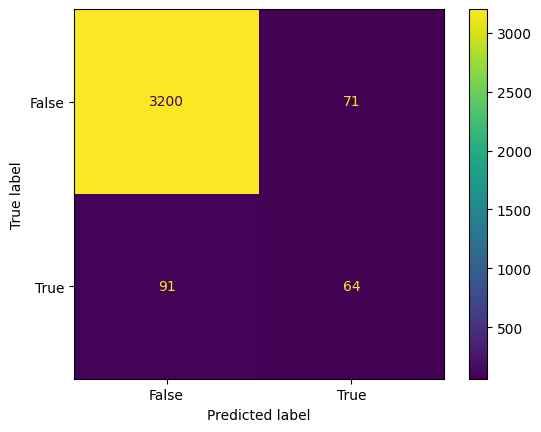

In [57]:
"""
Let's visualize the results using a confusion matrix.
However, the model hyperparameters can be tuned to improve the model's performance.
"""

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(total_y_test, total_y_pred)
visual_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
visual_cm.plot()

In [58]:
# Hyperparameter tuning by using max_depth to see if the model's performance can be improved
# Modifying the previous code to include the hyperparameter tuning

# Split the dataset into training and testing set using a 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Initialize the accuracy score, it will be used to tell the overall accuracy of the model
accuracy_values = []
# Initialize the precision score, it will be used to tell the overall precision of the model
precision_values = []
# Initialize the recall score, it will be used to tell the overall recall of the model.
# The recall value indicates the ability of the model to identify the positive class. (True Positive / (True Positive + False Negative)
recall_values = []
# Initialize the f1 score, it will be used to tell the overall f1 score of the model.
# The f1 score is the harmonic mean of precision and recall. It is a good measure of a model's accuracy.
# Calculated by 2 * (precision * recall) / (precision + recall)
f1_values = []

# Number of possible max_depth values
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Max depth ranking array to store the average metrics of each max_depth value
max_depth_ranking = []

# Iterate through the 10-fold cross-validation
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42, criterion="gini")
    for train_index, test_index in kf.split(X):
        # iloc is used to select the rows and columns by position
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit the model
        model.fit(X_train, y_train)
        # Predict the target
        y_pred = model.predict(X_test)
        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
        # Calculate the precision score
        precision = precision_score(y_test, y_pred)
        precision_values.append(precision)
        # Calculate the recall score
        recall = recall_score(y_test, y_pred)
        recall_values.append(recall)
        # Calculate the f1 score
        f1 = f1_score(y_test, y_pred)
        f1_values.append(f1)
    # Print out the max_depth value for easy tracking
    # print("The max_depth value is: ", max_depth)
    # Calculate the average accuracy score
    average_accuracy = np.mean(accuracy_values)
    # print("The average accuracy score is: ", average_accuracy)
    # Calculate the average precision score
    average_precision = np.mean(precision_values)
    # print("The average precision score is: ", average_precision)
    # Calculate the average recall score
    average_recall = np.mean(recall_values)
    # print("The average recall score is: ", average_recall)
    # Calculate the average f1 score
    average_f1 = np.mean(f1_values)
    # print("The average f1 score is: ", average_f1)
    max_depth_ranking.append([max_depth, average_accuracy, average_precision, average_recall, average_f1])
    # Clear the lists for the next max_depth value
    accuracy_values.clear()
    precision_values.clear()
    recall_values.clear()
    f1_values.clear()

# Find the best max_depth value based on the accuracy score
for max_depth in max_depth_ranking:
    if max_depth[1] == max(max_depth_ranking, key=lambda x: x[1])[1]:
        print("The best max_depth value based on the accuracy score is: ", max_depth[0])
        print("The average accuracy score is: ", max_depth[1])
        print("The average precision score is: ", max_depth[2])
        print("The average recall score is: ", max_depth[3])
        print("The average f1 score is: ", max_depth[4])

# Find the best max_depth value based on the precision score
for max_depth in max_depth_ranking:
    if max_depth[2] == max(max_depth_ranking, key=lambda x: x[2])[2]:
        print("The best max_depth value based on the precision score is: ", max_depth[0])
        print("The average accuracy score is: ", max_depth[1])
        print("The average precision score is: ", max_depth[2])
        print("The average recall score is: ", max_depth[3])
        print("The average f1 score is: ", max_depth[4])

# Find the best max_depth value based on the recall score
for max_depth in max_depth_ranking:
    if max_depth[3] == max(max_depth_ranking, key=lambda x: x[3])[3]:
        print("The best max_depth value based on the recall score is: ", max_depth[0])
        print("The average accuracy score is: ", max_depth[1])
        print("The average precision score is: ", max_depth[2])
        print("The average recall score is: ", max_depth[3])
        print("The average f1 score is: ", max_depth[4])

# Find the best max_depth value based on the f1 score
for max_depth in max_depth_ranking:
    if max_depth[4] == max(max_depth_ranking, key=lambda x: x[4])[4]:
        print("The best max_depth value based on the f1 score is: ", max_depth[0])
        print("The average accuracy score is: ", max_depth[1])
        print("The average precision score is: ", max_depth[2])
        print("The average recall score is: ", max_depth[3])
        print("The average f1 score is: ", max_depth[4])

/Users/sierra/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sierra/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sierra/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sierra/Libra

The best max_depth value based on the accuracy score is:  9
The average accuracy score is:  0.9617692189657816
The average precision score is:  0.6227394827394827
The average recall score is:  0.4399787458843186
The average f1 score is:  0.4996099824885432
The best max_depth value based on the precision score is:  9
The average accuracy score is:  0.9617692189657816
The average precision score is:  0.6227394827394827
The average recall score is:  0.4399787458843186
The average f1 score is:  0.4996099824885432
The best max_depth value based on the recall score is:  9
The average accuracy score is:  0.9617692189657816
The average precision score is:  0.6227394827394827
The average recall score is:  0.4399787458843186
The average f1 score is:  0.4996099824885432
The best max_depth value based on the f1 score is:  9
The average accuracy score is:  0.9617692189657816
The average precision score is:  0.6227394827394827
The average recall score is:  0.4399787458843186
The average f1 score is:

In [61]:
# Visualize the confusion matrix using the best max_depth value
model = DecisionTreeClassifier(max_depth=9, random_state=42, criterion="gini")
# Split the dataset into training and testing set using a 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Initialize the accuracy score, it will be used to tell the overall accuracy of the model
accuracy_values = []
# Initialize the precision score, it will be used to tell the overall precision of the model
precision_values = []
# Initialize the recall score, it will be used to tell the overall recall of the model.
# The recall value indicates the ability of the model to identify the positive class. (True Positive / (True Positive + False Negative)
recall_values = []
# Initialize the f1 score, it will be used to tell the overall f1 score of the model.
# The f1 score is the harmonic mean of precision and recall. It is a good measure of a model's accuracy.
# Calculated by 2 * (precision * recall) / (precision + recall)
f1_values = []
# Total y_test and y_pred to build a confusion matrix later.
total_y_test = []
total_y_pred = []

# Iterate through the 10-fold cross-validation
for train_index, test_index in kf.split(X):
    # iloc is used to select the rows and columns by position
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    total_y_test = total_y_test + list(y_test)
    # Fit the model
    model.fit(X_train, y_train)
    # Predict the target
    y_pred = model.predict(X_test)
    total_y_pred = total_y_pred + list(y_pred)
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    # Calculate the precision score
    precision = precision_score(y_test, y_pred)
    precision_values.append(precision)
    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    recall_values.append(recall)
    # Calculate the f1 score
    f1 = f1_score(y_test, y_pred)
    f1_values.append(f1)

# Calculate the average accuracy score
average_accuracy = np.mean(accuracy_values)
print("The average accuracy score is: ", average_accuracy)
# Calculate the average precision score
average_precision = np.mean(precision_values)
print("The average precision score is: ", average_precision)
# Calculate the average recall score
average_recall = np.mean(recall_values)
print("The average recall score is: ", average_recall)
# Calculate the average f1 score
average_f1 = np.mean(f1_values)
print("The average f1 score is: ", average_f1)

The average accuracy score is:  0.9617692189657816
The average precision score is:  0.6227394827394827
The average recall score is:  0.4399787458843186
The average f1 score is:  0.4996099824885432


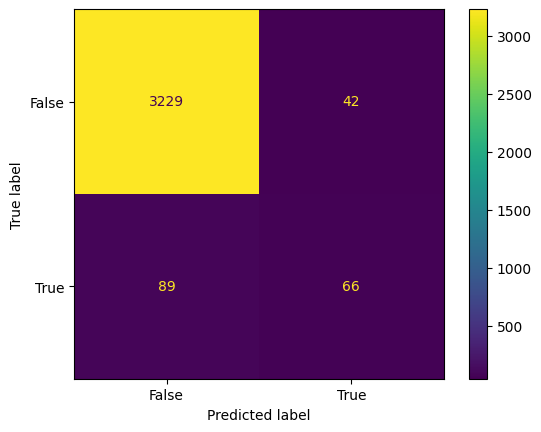

In [62]:
# After hyperparameter tuning, the model's performance improved. The average accuracy score increased from 0.86 to 0.89.
# Visualize the confusion matrix using the best max_depth value
cm = confusion_matrix(total_y_test, total_y_pred)
visual_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
visual_cm.plot()
